# MATH 4172 W18 FINAL PROJECT 

### By: Heajung Nam 
### Student Number: 214457758 

## INTRODUCTION

Group member: Heajung Nam (code & reporting)

This report was created as an individual group for Winter 2018 Math 4172 Final Project. 
The goal of this project is to reproduce all charts presented in the paper called, "The Intuition Behind Black-Litterman Model Portfolios" by Guangliang He and Robert Litterman which demonstrates numerical examples of Black-Litterman model (allocation model). 

In Part1, the computations and charts shown in the paper were replicated and reproduced. 

In Part2, the data was changed as instructed below, and then the analysis was repeated as in Part1. The following conditions should be applied for the Part2 analysis: 
* AppendixA Table1 'Equilibrium Portfolio Weight(%)': increased the weight the first three countries by 0.5%; decreased weight of the next three countries by 0.5%; and kept the USA weight unchanged; 
* AppendixA Table1 'Equilibrium Expected Returns(%)': the column updated accordingly; 
* and all other data remain unchanged.

The initial data was set-up based on the data given in the Appendix A Table 1 and 2 of the paper. 
The traditional mean-variance approach was based on Markowitz mean-variance model. 
For the expected returns, E[R]=([((τΣ)^-1) + P'(Ω^-1)P]^-1) * [((τΣ)^-1)Π + P'(Ω^-1)Q] where Π=δΣw was used. 
And the 1 view/2 views approach was based on the black-litterman model. 

## PART 1

In [20]:
#Initial Data Set-up
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

countries = ['AUL', 'CAN', 'FRA', 'GER', 'JAP', 'UKG', 'USA'] #abbreviate form of country names
data1 = pd.DataFrame(np.array([[16.0, 1.6, 3.9],
                               [20.3, 2.2, 6.9],
                               [24.8, 5.2, 8.4],
                               [27.1, 5.5, 9.0],
                               [21.0, 11.6, 4.3],
                               [20.0, 12.4, 6.8],
                               [18.7, 61.5, 7.6]]), index = countries, columns = ['Volatility', 'EWeight', 'EReturns'])
data2 = pd.DataFrame(np.array([[0.5, 0, 0, 0, 0, 0, 0],
                               [0.488, 0.5, 0, 0, 0, 0, 0],
                               [0.478, 0.664, 0.5, 0, 0, 0, 0],
                               [0.515, 0.655, 0.861, 0.5, 0, 0, 0],
                               [0.439, 0.310, 0.355, 0.354, 0.5, 0, 0],
                               [0.512, 0.608, 0.783, 0.777, 0.405, 0.5, 0],
                               [0.491, 0.779, 0.668, 0.653, 0.306, 0.652, 0.5]]), index = countries, columns = countries) 
data1 = data1 / 100 #convert into decimal value of percentages
corr = data2 + data2.T #correlation 
n = len(data1) #7

#Raw data 
delta = 2.5 #given in the paper
sd = data1.loc[: ,'Volatility'] #standard deviation
weq = data1.loc[: ,'EWeight']
req = data1.loc[: ,'EReturns']
corr = corr
cov = np.outer(sd, sd) * corr  #covariance
req = delta * cov.dot(weq) 

### P1 Chart 1: Markowitz Mean-Variance Approach

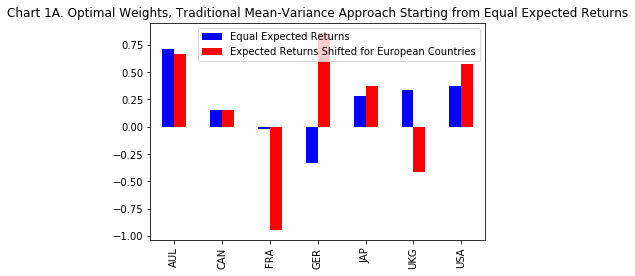

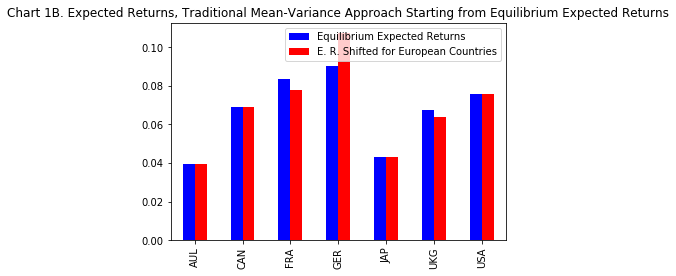

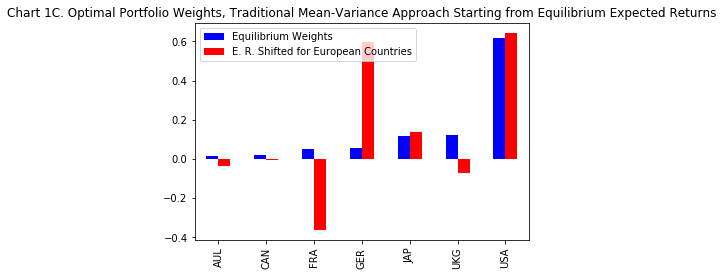

In [21]:
#Chart 1A: 
#Step1. Set the expected returns for all countries equal to 7%. Weights are updated accordingly. 
er1 = np.array([[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]]) #expected returns
er1 = er1 / 100 
w1 = np.dot(np.linalg.inv(delta * cov), er1.T)
#Step2. Shifts the expected return for GER by up by 2.5% and for other European countries,FRA and UKG, down by 2.5%. 
#       Thus, expected return for FRA and UKG becomes 7.0-2.5=4.5% and for GER becomes 7.0+2.5=9.5%. 
er1a = np.array([[7.0, 7.0, 4.5, 9.5, 7.0, 4.5, 7.0]]) 
er1a = er1a / 100 
w1a = np.dot(np.linalg.inv(delta * cov), er1a.T) #updated weights

d1a = (pd.DataFrame([w1.reshape(n), w1a.reshape(n)], columns = countries, index = ['Equal Expected Returns', 'Expected Returns Shifted for European Countries'])).T
result1a = d1a.plot.bar(color = 'br', title = 'Chart 1A. Optimal Weights, Traditional Mean-Variance Approach Starting from Equal Expected Returns')
plt.show(result1a)

#Chart 1B:
req1 = req.as_matrix()
change = np.array([[0.0, 0.0, -0.6, 1.7, 0.0, -0.4, 0.0]]) #change in the percentage
change = change / 100
er1b = req1 + change
d1b = (pd.DataFrame([req1.reshape(n), er1b.reshape(n)], columns = countries, index=['Equilibrium Expected Returns', 'E. R. Shifted for European Countries'])).T
result1b = d1b.plot.bar(color = 'br',title = 'Chart 1B. Expected Returns, Traditional Mean-Variance Approach Starting from Equilibrium Expected Returns')
plt.show(result1b)

#Chart 1C: 
weq1 = weq.as_matrix()
w1c = np.dot(np.linalg.inv(delta * cov), er1b.T)
d1c = (pd.DataFrame([weq1.reshape(n), w1c.reshape(n)], columns = countries, index=['Equilibrium Weights', 'E. R. Shifted for European Countries'])).T
result1c = d1c.plot.bar(color = 'br', title = 'Chart 1C. Optimal Portfolio Weights, Traditional Mean-Variance Approach Starting from Equilibrium Expected Returns')
plt.show(result1c)

### P1 Chart 2: Black-Litterman Approach - 1 View

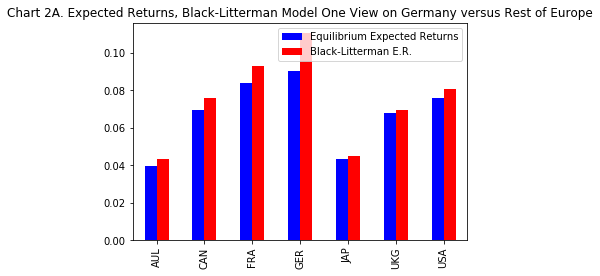

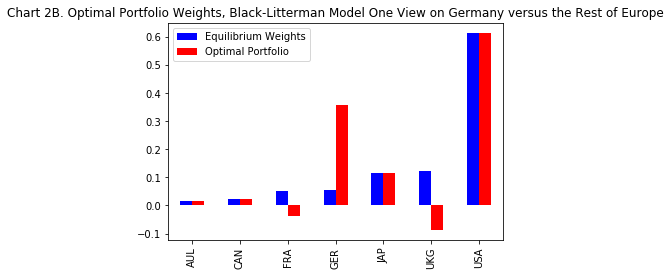

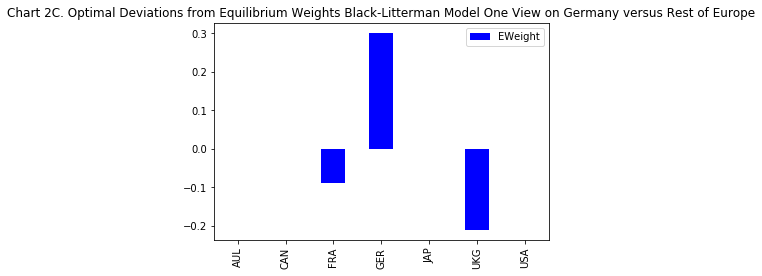

In [22]:
from numpy.linalg import inv
from numpy import diag
def blmean(tau, cov, P, O, R, Q): #Function to calculate the black-litterman mean based on Appendix B.4
    return inv(inv(tau * cov) + P.T.dot(inv(O)).dot(P)).dot(inv(tau * cov).dot(R) + P.T.dot(inv(O)).dot(Q))            
def blcov(tau, cov, P, O): #calculates the black-litterman covariance
    return inv(inv(tau * cov) + P.T.dot(inv(O)).dot(P))
def max_weight(delta, cov, mu): #calculates the optimal weight based on Appendix C.1
    return inv(delta * cov).dot(mu)
#View 1 
view1 = ['Germany versus Rest of Europe']
weu = (weq['FRA'] + weq['UKG']) #weights for the rest of the European markets, FRA and UKG
#Since GER outperforms other European countries by 5%
P_view1 = pd.DataFrame({'GER':1, 'FRA':-weq['FRA']/weu, 'UKG':-weq['UKG']/weu}, columns = countries, index = view1) 
P_view1 = P_view1.fillna(value=0)
Q = np.array([0.05]) #outperformance %
tau = 1 
O = tau * diag(diag(P_view1.dot(cov).dot(P_view1.T))) #omega since O = tau* P.cov.P.T
R = req
er_view1 = (pd.Series(blmean(tau, cov, P_view1.values, O, R, Q), index = countries, name = 'Black-Litterman E.R')).as_matrix()
w_view1 = (pd.Series(max_weight(delta, cov, er_view1), index = countries, name = 'Optimal Portfolio')).as_matrix()

#Chart 2A:
d2a = (pd.DataFrame([req1, er_view1], columns = countries, index = ['Equilibrium Expected Returns', 'Black-Litterman E.R.'])).T
result2a = d2a.plot.bar(color = 'br', title = 'Chart 2A. Expected Returns, Black-Litterman Model One View on Germany versus Rest of Europe')
plt.show(result2a)

#Chart 2B:
d2b = (pd.DataFrame([weq1, w_view1], columns = countries, index=['Equilibrium Weights', 'Optimal Portfolio'])).T
result2b = d2b.plot.bar(color = 'br', title = 'Chart 2B. Optimal Portfolio Weights, Black-Litterman Model One View on Germany versus the Rest of Europe')
plt.show(result2b)

#Chart 2C:
d2c = pd.DataFrame(w_view1.reshape(n) - weq)
result2c = d2c.plot.bar(color = 'b', title = 'Chart 2C. Optimal Deviations from Equilibrium Weights Black-Litterman Model One View on Germany versus Rest of Europe')
plt.show(result2c)

### P1 Chart 3: Black-Litterman Approach - 2 Views

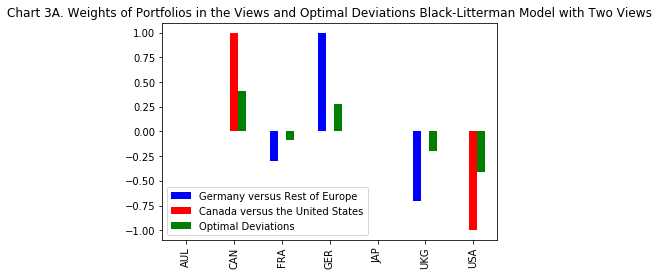

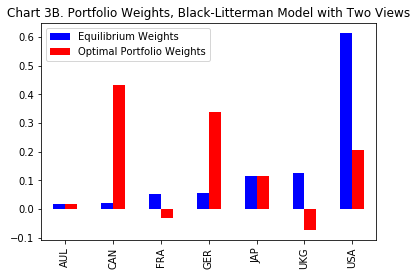

In [23]:
#View2
view1 = ['Germany vs Rest of Europe']
view2 = ['Canada vs US']
weu = (weq['FRA']+ weq['UKG'])
wamerica = weq['USA'] #weight of USA
P1 = pd.DataFrame({'GER':1, 'FRA':-weq['FRA']/weu, 'UKG':-weq['UKG']/weu}, columns = countries, index = view1)
P1 = P1.fillna(value=0)
P2 = pd.DataFrame({'CAN':1, 'USA':-weq['USA']/wamerica}, columns = countries, index = view2)  
P2 = P2.fillna(value=0)   
P_view2 = P1.append(P2)
P_view2m = P_view2.as_matrix()
Q_view2 = np.array([0.05, 0.03]) #Canadian equity market outperforms the US equity market by 3% per year
tau = 0.05 
O_view2 = tau * diag(diag(P_view2.dot(cov).dot(P_view2.T))) 
R = req
er_view2 = (pd.Series(blmean(tau, cov, P_view2.values, O_view2, R, Q_view2), index = countries, name = 'Black-Litterman E.R')).as_matrix()
#er_view2 = req1 + np.dot(np.dot(tau * np.dot(cov, P_view2.T), np.linalg.inv(tau * np.dot(np.dot(P_view2, cov),P_view2.T) + O_view2)), (Q_view2 - np.dot(P_view2, req1)))
w_view2 = (pd.Series(max_weight(delta, cov, er_view2), index = countries, name = 'Optimal Portfolio')).as_matrix()

# Chart 3A:
d3a = (pd.DataFrame([P_view2m[0], P_view2m[1], w_view2 - weq1], columns = countries, index = ['Germany versus Rest of Europe', 'Canada versus the United States', 'Optimal Deviations'])).T
result3a = d3a.plot.bar(color = 'brg', title = 'Chart 3A. Weights of Portfolios in the Views and Optimal Deviations Black-Litterman Model with Two Views')
plt.show(result3a)

# Chart 3B: 
d3b = (pd.DataFrame([weq1, w_view2], columns = countries, index = ['Equilibrium Weights', 'Optimal Portfolio Weights'])).T
result3b = d3b.plot.bar(color='br', title = 'Chart 3B. Portfolio Weights, Black-Litterman Model with Two Views')
plt.show(result3b)

### P1 Chart 4

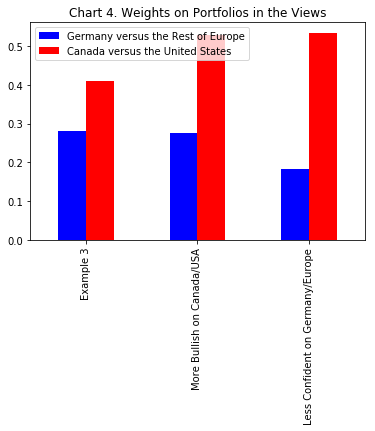

In [25]:
#Function to calculate the black-litterman weights for certain views based on Appendix B.5. 
def blView_weights(tau, cov, P, O, req, Q, delta, weq): 
    Part1 = tau * inv(O).dot(Q) / delta
    Part2i = inv(O / tau + P.dot(cov).dot(P.T)).dot(P).dot(cov)
    Part2 = Part2i.dot(weq)
    Part3 = Part2i.dot(P.T).dot(inv(O)).dot(Q) * tau / delta 
    theWeights = Part1 - Part2 - Part3 
    return theWeights 

O4 = np.array([O_view2[0] * 2, O_view2[1]]) #from O_view2, doubled the omega for Germany vs Europe (less confidence)
#O4 = np.array([[0.001065383332*2,0], [0,0.0008517381]])
Q4 = np.array([0.05, 0.04]) #increased the outperformance for Canada vs US from 3% to 4%
a = blView_weights(tau, cov, P_view2, O_view2, req, Q_view2, delta, weq) #a = array([[0.28188883],[0.41132253]])
b = blView_weights(tau, cov, P_view2, O_view2, req, Q4, delta, weq) #b = array([[0.27634295],[0.52905628]])
c = blView_weights(tau, cov, P_view2, O4, req, Q4, delta, weq) #c = array([[0.18405788],[0.53449379]])   

ai = np.array([a[0],b[0],c[0]]) #updated data set for graphing
bi = np.array([a[1],b[1],c[1]])
m = len(ai)

d4 = (pd.DataFrame([ai.reshape(m), bi.reshape(m)],                  
                   columns = ['Example 3', 'More Bullish on Canada/USA', 'Less Confident on Germany/Europe'],
                   index = ['Germany versus the Rest of Europe','Canada versus the United States'])).T
result4 = d4.plot.bar(color = 'br', title = 'Chart 4. Weights on Portfolios in the Views')
plt.show(result4)

### P1 Chart 5: 2 Views with Risk Constrained 

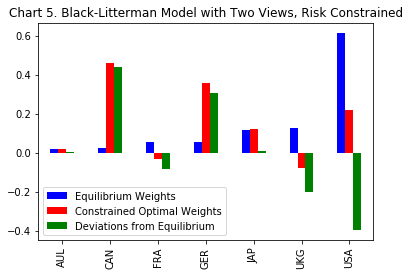

In [26]:
import math
P5 = P_view2m #for two views
Q5 = Q_view2 #for two views
O5 = O4 #omega from chart4, less confidence in Germany vs Europe
er5 = req1 + np.dot(np.dot(tau * np.dot(cov, P5.T), np.linalg.inv(tau * np.dot(np.dot(P5, cov),P5.T) + O5)), (Q5 - np.dot(P5, req1)))
target_risk = 0.2 #target risk level of 20% per year
w5 = target_risk * w_view2 / math.sqrt(np.dot(w_view2.T, np.dot(cov, w_view2)))

deviation = w5 - weq1
d5 = (pd.DataFrame([weq1, w5, deviation], columns = countries, index=['Equilibrium Weights', 'Constrained Optimal Weights', 'Deviations from Equilibrium'])).T
result5 = d5.plot.bar(color = 'brg', title = 'Chart 5. Black-Litterman Model with Two Views, Risk Constrained')
plt.show(result5)

### P1 Chart 6: 2 Views with Risk and Budget Constrained

Ipopt 3.11.1: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.11.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:        7
Number of nonzeros in inequality constraint Jacobian.:        7
Number of nonzeros in Lagrangian Hessian.............:       28

Total number of variables............................:        7
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0


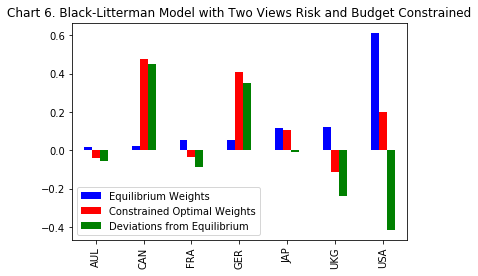

The risk & budget constrained optimal weights found are the following: 
     optimal weight
AUL       -0.041634
CAN        0.474987
FRA       -0.033846
GER        0.407417
JAP        0.107241
UKG       -0.112237
USA        0.198071


In [27]:
#On top of the risk constraint, budget constraint forces the sum of the total portfolio weights to be 1. Σwi = 1. 
#Now we faces 2 constraints. 
from pyomo.environ import ConcreteModel, Var, value, Reals, Constraint, Objective, maximize, minimize
from pyomo.opt import SolverFactory
M = list(range(0, 7)) #set model size
cov6 = cov.as_matrix() 
model = ConcreteModel()
model.x = Var(M, domain = Reals)
model.obj = Objective(expr = sum(model.x[i] * er_view2.item(i) for i in M), sense = maximize) #maximize returns
model.con1 = Constraint(expr = sum(model.x[j] * cov6[i][j] * model.x[i] for i in M for j in M) <= 0.04) #1/20%
model.con2 = Constraint(expr = sum(model.x[i] for i in M) == 1.0) #budget constraint
solver = SolverFactory('ipopt')
solver.solve(model, tee = True)
w6=np.array([[value(model.x[0])],
             [value(model.x[1])],
             [value(model.x[2])],
             [value(model.x[3])],
             [value(model.x[4])],
             [value(model.x[5])],
             [value(model.x[6])]])

deviation6 = w6.reshape(n) - weq1
d6 = (pd.DataFrame([weq1, w6.reshape(n), deviation6], columns = countries, index=['Equilibrium Weights', 'Constrained Optimal Weights', 'Deviations from Equilibrium'])).T
result6 = d6.plot.bar(color = 'brg', title = 'Chart 6. Black-Litterman Model with Two Views Risk and Budget Constrained')
plt.show(result6)

#The optimal weight found is:
print('The risk & budget constrained optimal weights found are the following: ')
optimal_weight6 = pd.DataFrame(w6.T, columns = countries, index=['optimal weight']).T
print(optimal_weight6)

### P1 Chart 7: 2 Views with Risk, Budget, and Beta Constrained

Ipopt 3.11.1: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.11.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:       14
Number of nonzeros in inequality constraint Jacobian.:        7
Number of nonzeros in Lagrangian Hessian.............:       28

Total number of variables............................:        7
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0


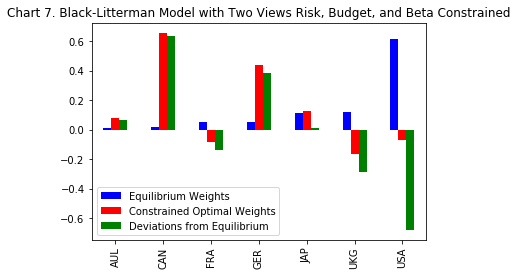

The risk & budget & beta constrained optimal weights found are the following: 
     optimal weight
AUL        0.083521
CAN        0.659704
FRA       -0.084174
GER        0.443422
JAP        0.126261
UKG       -0.163787
USA       -0.064948


In [28]:
#On top of the risk and budget constraints, beta constraint forces the beta of the portfolio with respect to the market portfolio to be 1.
#Now we faces 3 constraints. 
M2 = list(range(0, 7)) #set model size
cov7 = cov.as_matrix() 
model2 =ConcreteModel()
model2.x = Var(M, domain = Reals)
model2.obj = Objective(expr = sum(model2.x[i] * er_view2.item(i) for i in M2), sense = maximize) #maximize returns
model2.con1 = Constraint(expr = sum(model2.x[j] * cov7[i][j] * model2.x[i] for i in M2 for j in M2) <= 0.04) #risk constraint
model2.con2 = Constraint(expr = sum(model2.x[i] for i in M2) == 1.0) #budget constraint
EU1 = sum(model2.x[i] * cov7[i][j] * weq1.item(j) for i in M2 for j in M2)
EU2 = sum(weq1.item(i) * cov7[i][j] * weq1.item(j) for i in M2 for j in M2)
model2.con3 = Constraint(expr = EU1 == EU2) #beta constraint
solver = SolverFactory('ipopt')
solver.solve(model2, tee = True)
w7 = np.array([[value(model2.x[0])],
               [value(model2.x[1])],
               [value(model2.x[2])],
               [value(model2.x[3])],
               [value(model2.x[4])],
               [value(model2.x[5])],
               [value(model2.x[6])]])

deviation7 = w7.reshape(n) - weq1
d7 = (pd.DataFrame([weq1, w7.reshape(n), deviation7], columns = countries, index=['Equilibrium Weights', 'Constrained Optimal Weights', 'Deviations from Equilibrium'])).T
result7 = d7.plot.bar(color = 'brg', title = 'Chart 7. Black-Litterman Model with Two Views Risk, Budget, and Beta Constrained')
plt.show(result7)

#The optimal weight found is:
print('The risk & budget & beta constrained optimal weights found are the following: ')
optimal_weight7 = pd.DataFrame(w7.T, columns = countries, index=['optimal weight']).T
print(optimal_weight7)

## PART 2

The following conditions should be applied for the Part2 analysis: 
* AppendixA Table1 'Equilibrium Portfolio Weight(%)': increased the weight the first three countries by 0.5%; decreased weight of the next three countries by 0.5%; and kept the USA weight unchanged; 
* AppendixA Table1 'Equilibrium Expected Returns(%)': the column updated accordingly; 
* and all other data remain unchanged.

In [29]:
#Initial Data Set-up
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

countries = ['AUL', 'CAN', 'FRA', 'GER', 'JAP', 'UKG', 'USA'] #abbreviate form of country names
#For part2, equilibrium portfolio weight for the first three countries were increased by 0.5%; next theee countries were decreased by 0.5%;
#and the USA weight was unchanged
data3 = pd.DataFrame(np.array([[16.0, 2.1, 3.9], 
                               [20.3, 2.7, 6.9],
                               [24.8, 5.7, 8.4],
                               [27.1, 5.0, 9.0],
                               [21.0, 11.1, 4.3],
                               [20.0, 11.9, 6.8],
                               [18.7, 61.5, 7.6]]), index = countries, columns = ['Volatility', 'EWeight', 'EReturns'])
data4 = pd.DataFrame(np.array([[0.5, 0, 0, 0, 0, 0, 0],
                               [0.488, 0.5, 0, 0, 0, 0, 0],
                               [0.478, 0.664, 0.5, 0, 0, 0, 0],
                               [0.515, 0.655, 0.861, 0.5, 0, 0, 0],
                               [0.439, 0.310, 0.355, 0.354, 0.5, 0, 0],
                               [0.512, 0.608, 0.783, 0.777, 0.405, 0.5, 0],
                               [0.491, 0.779, 0.668, 0.653, 0.306, 0.652, 0.5]]), index = countries, columns = countries) 
data3 = data3 / 100 #convert into decimal value of percentages
corr = data4 + data4.T #correlation 
n = len(data3) #7

#Raw data 
delta = 2.5 #given in the paper
sd = data3.loc[: ,'Volatility'] #standard deviation
weq = data3.loc[: ,'EWeight']
req = data3.loc[: ,'EReturns']
corr = corr
cov = np.outer(sd, sd) * corr  #covariance
req = delta * cov.dot(weq) #updated for part2 analysis
print('The Updated Equilibrium Portfolio Weight(%) for Part2 Analysis is the following: ')
print(weq)
print(" ")
print('The Updated Equilibrium Expected Returns(%) for Part2 Analysis is the following: ')
print(req)

The Updated Equilibrium Portfolio Weight(%) for Part2 Analysis is the following: 
AUL    0.021
CAN    0.027
FRA    0.057
GER    0.050
JAP    0.111
UKG    0.119
USA    0.615
Name: EWeight, dtype: float64
 
The Updated Equilibrium Expected Returns(%) for Part2 Analysis is the following: 
AUL    0.039462
CAN    0.069359
FRA    0.083565
GER    0.090029
JAP    0.042593
UKG    0.067437
USA    0.075672
dtype: float64


### P2 Chart 1: Markowitz Mean-Variance Approach

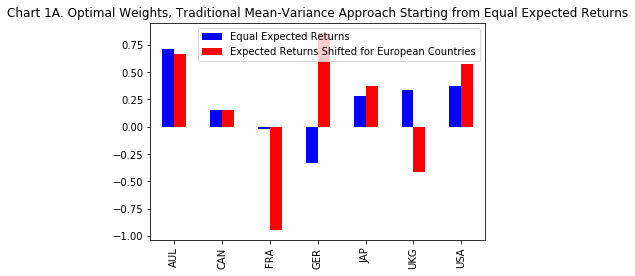

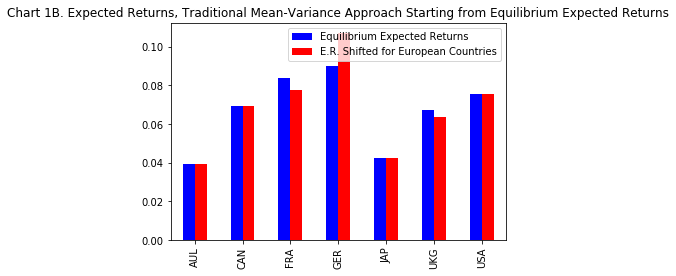

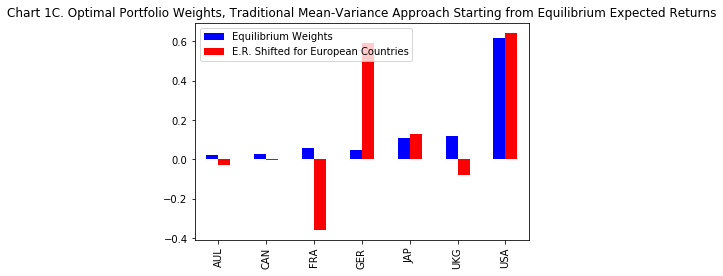

In [30]:
# Chart 1A: 
#Step1. Set the expected returns for all countries equal to 7%. Weights are updated accordingly. 
er1 = np.array([[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]]) #expected returns
er1 = er1 / 100 
w1 = np.dot(np.linalg.inv(delta * cov), er1.T)
#Step2. Shifts the expected return for GER by up by 2.5% and for other European countries,FRA and UKG, down by 2.5%. 
#       Thus, expected return for FRA and UKG becomes 7.0-2.5=4.5% and for GER becomes 7.0+2.5=9.5%. 
er1a = np.array([[7.0, 7.0, 4.5, 9.5, 7.0, 4.5, 7.0]]) 
er1a = er1a / 100 
w1a = np.dot(np.linalg.inv(delta * cov), er1a.T) #updated weights

d1a = (pd.DataFrame([w1.reshape(n), w1a.reshape(n)], columns = countries, index = ['Equal Expected Returns','Expected Returns Shifted for European Countries'])).T
result1a = d1a.plot(kind='bar', color='br', title = 'Chart 1A. Optimal Weights, Traditional Mean-Variance Approach Starting from Equal Expected Returns')
plt.show(result1a)

# Chart 1B:
req1 = req.as_matrix()
change = np.array([[0.0, 0.0, -0.6, 1.7, 0.0, -0.4, 0.0]])
change = change / 100
er1b = req1 + change
d1b = (pd.DataFrame([req1.reshape(n), er1b.reshape(n)], columns = countries, index=['Equilibrium Expected Returns','E.R. Shifted for European Countries'])).T
result1b = d1b.plot(kind='bar', color='br',title = 'Chart 1B. Expected Returns, Traditional Mean-Variance Approach Starting from Equilibrium Expected Returns')
plt.show(result1b)

# Chart 1C:
weq1 = weq.as_matrix()
w1c = np.dot(np.linalg.inv(delta * cov), er1b.T)
d1c = (pd.DataFrame([weq1.reshape(n), w1c.reshape(n)], columns = countries, index=['Equilibrium Weights', 'E.R. Shifted for European Countries'])).T
result1c = d1c.plot(kind='bar', color='br', title = 'Chart 1C. Optimal Portfolio Weights, Traditional Mean-Variance Approach Starting from Equilibrium Expected Returns')
plt.show(result1c)

### P2 Chart 2: Black-Litterman Approach - 1 View

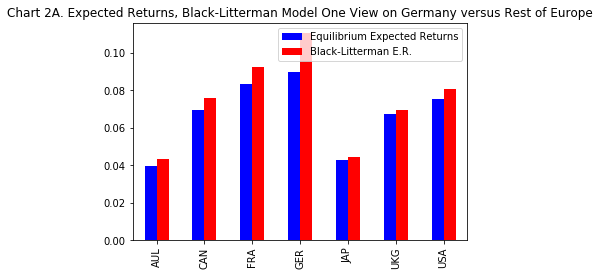

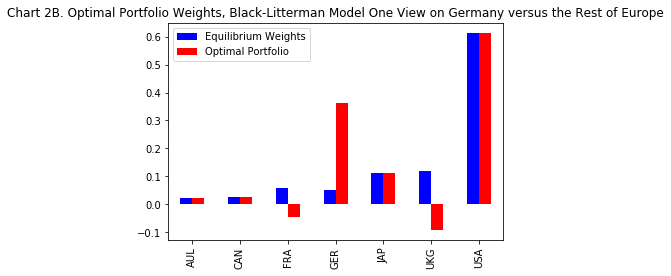

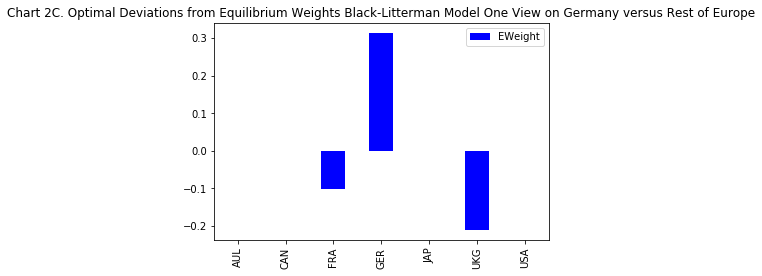

In [31]:
from numpy.linalg import inv
from numpy import diag
def blmean(tau, cov, P, O, R, Q): #Function to calculate the black-litterman mean based on Appendix B.4
    return inv(inv(tau * cov) + P.T.dot(inv(O)).dot(P)).dot(inv(tau * cov).dot(R) + P.T.dot(inv(O)).dot(Q))            
def blcov(tau, cov, P, O): #calculates the black-litterman covariance
    return inv(inv(tau * cov) + P.T.dot(inv(O)).dot(P))
def max_weight(delta, cov, mu): #calculates the optimal weight based on Appendix C.1
    return inv(delta * cov).dot(mu)
#View 1 
view1 = ['Germany vs Rest of Europe']
weu = (weq['FRA'] + weq['UKG']) #weights for the rest of the European markets, FRA and UKG
#Since GER outperforms other European countries by 5%
P_view1 = pd.DataFrame({'GER':1, 'FRA':-weq['FRA']/weu, 'UKG':-weq['UKG']/weu}, columns = countries, index = view1) 
P_view1 = P_view1.fillna(value=0)
Q = np.array([0.05]) #outperformance %
tau = 1 
O = tau * diag(diag(P_view1.dot(cov).dot(P_view1.T))) #omega
R = req
er_view1 = (pd.Series(blmean(tau, cov, P_view1.values, O, R, Q), index = countries, name = 'Black-Litterman E.R')).as_matrix()
w_view1 = (pd.Series(max_weight(delta, cov, er_view1), index = countries, name = 'Optimal Portfolio')).as_matrix()

# Chart 2A:
d2a = (pd.DataFrame([req1, er_view1], columns = countries, index = ['Equilibrium Expected Returns', 'Black-Litterman E.R.'])).T
result2a = d2a.plot.bar(color='br', title = 'Chart 2A. Expected Returns, Black-Litterman Model One View on Germany versus Rest of Europe')
plt.show(result2a)

# Chart 2B:
d2b = (pd.DataFrame([weq1, w_view1], columns = countries, index=['Equilibrium Weights', 'Optimal Portfolio'])).T
result2b = d2b.plot.bar(color='br', title = 'Chart 2B. Optimal Portfolio Weights, Black-Litterman Model One View on Germany versus the Rest of Europe')
plt.show(result2b)

# Chart 2C:
d2c = pd.DataFrame(w_view1 - weq)
result2c = d2c.plot.bar(color='b', title = 'Chart 2C. Optimal Deviations from Equilibrium Weights Black-Litterman Model One View on Germany versus Rest of Europe')
plt.show(result2c)

### P2 Chart 3: Black-Litterman Approach - 2 Views

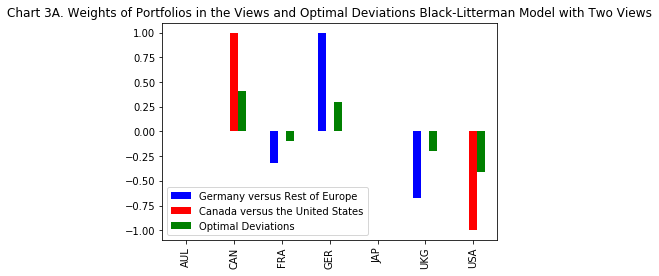

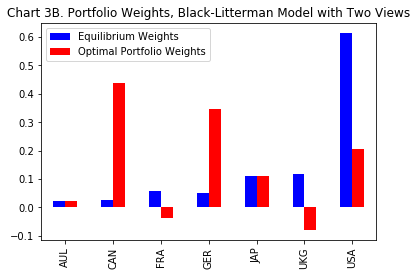

In [32]:
#View2
view1 = ['Germany vs Rest of Europe']
view2 = ['Canada vs US']
weu = weq['FRA']+ weq['UKG']
wamerica = weq['USA']
P1 = pd.DataFrame({'GER':1, 'FRA':-weq['FRA']/weu, 'UKG':-weq['UKG']/weu}, columns = countries, index = view1)
P1 = P1.fillna(value=0)
P2 = pd.DataFrame({'CAN':1, 'USA':-weq['USA']/wamerica}, columns = countries, index = view2)  
P2 = P2.fillna(value=0)   
P_view2 = P1.append(P2)
P_view2m = P_view2.as_matrix()
Q_view2 = np.array([0.05, 0.03]) #Canadian equity market outperforms the US equity market by 3% per year
tau = 0.05 
O_view2 = tau * diag(diag(P_view2.dot(cov).dot(P_view2.T))) 
R = req
er_view2i = pd.Series(blmean(tau, cov, P_view2.values, O_view2, R, Q_view2), index = countries, name = 'Black-Litterman E.R')
er_view2 = er_view2i.as_matrix()
w_view2 = (pd.Series(max_weight(delta, cov, er_view2), index = countries, name = 'Optimal Portfolio')).as_matrix()

# Chart 3A:
d3a = (pd.DataFrame([P_view2m[0], P_view2m[1], w_view2 - weq1], columns = countries, index = ['Germany versus Rest of Europe', 'Canada versus the United States', 'Optimal Deviations'])).T
result3a = d3a.plot.bar(color = 'brg', title = 'Chart 3A. Weights of Portfolios in the Views and Optimal Deviations Black-Litterman Model with Two Views')
plt.show(result3a)

# Chart 3B: 
d3b = (pd.DataFrame([weq1, w_view2], columns = countries, index = ['Equilibrium Weights', 'Optimal Portfolio Weights'])).T
result3b = d3b.plot.bar(color='br', title = 'Chart 3B. Portfolio Weights, Black-Litterman Model with Two Views')
plt.show(result3b)

### P2 Chart 4

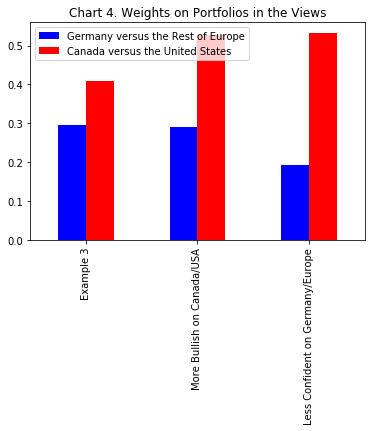

In [33]:
#Function to calculate the black-litterman weights for certain views based on Appendix B.5. 
def blView_weights(tau, cov, P, O, req, Q, delta, weq): 
    Part1 = tau * inv(O).dot(Q) / delta
    Part2i = inv(O / tau + P.dot(cov).dot(P.T)).dot(P).dot(cov)
    Part2 = Part2i.dot(weq)
    Part3 = Part2i.dot(P.T).dot(inv(O)).dot(Q) * tau / delta 
    theWeights = Part1 - Part2 - Part3 
    return theWeights 

O4 = O4 = np.array([O_view2[0]*2, O_view2[1]]) #from O_view2, doubled the omega for Germany vs Europe (less confidence)
#O4 = np.array([[0.001065383332*2,0], [0,0.0008517381]])
Q4 = np.array([0.05, 0.04]) #increased the outperformance for Canada vs US from 3% to 4%
a = blView_weights(tau, cov, P_view2, O_view2, req, Q_view2, delta, weq) #a = array([[0.28188883],[0.41132253]])
b = blView_weights(tau, cov, P_view2, O_view2, req, Q4, delta, weq) #b = array([[0.27634295],[0.52905628]])
c = blView_weights(tau, cov, P_view2, O4, req, Q4, delta, weq) #c = array([[0.18405788],[0.53449379]])   

ai = np.array([a[0],b[0],c[0]]) #updated data set for graphing
bi = np.array([a[1],b[1],c[1]])
m = len(ai)

d4 = (pd.DataFrame([ai.reshape(m), bi.reshape(m)],                  
                   columns = ['Example 3', 'More Bullish on Canada/USA', 'Less Confident on Germany/Europe'],
                   index = ['Germany versus the Rest of Europe','Canada versus the United States'])).T
result4 = d4.plot.bar(color = 'br', title = 'Chart 4. Weights on Portfolios in the Views')
plt.show(result4)

### P2 Chart 5

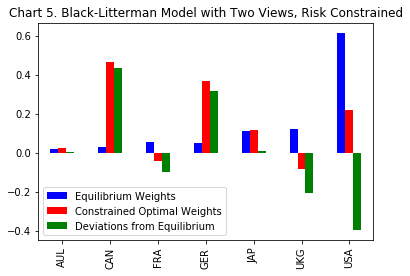

In [34]:
import math
P5 = P_view2m #for two views
Q5 = Q_view2 #for two views
O5 = O4 #omega from chart4, less confidence in Germany vs Europe
er5 = req1 + np.dot(np.dot(tau * np.dot(cov, P5.T), np.linalg.inv(tau * np.dot(np.dot(P5, cov),P5.T) + O5)), (Q5 - np.dot(P5, req1)))
target_risk = 0.2 #target risk level of 20% per year
w5 = target_risk * w_view2 / math.sqrt(np.dot(w_view2.T, np.dot(cov, w_view2)))

deviation = w5 - weq1
d5 = (pd.DataFrame([weq1, w5, deviation], columns = countries, index=['Equilibrium Weights', 'Constrained Optimal Weights', 'Deviations from Equilibrium'])).T
result5 = d5.plot.bar(color = 'brg', title = 'Chart 5. Black-Litterman Model with Two Views, Risk Constrained')
plt.show(result5)

### P2 Chart 6

Ipopt 3.11.1: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.11.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:        7
Number of nonzeros in inequality constraint Jacobian.:        7
Number of nonzeros in Lagrangian Hessian.............:       28

Total number of variables............................:        7
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0


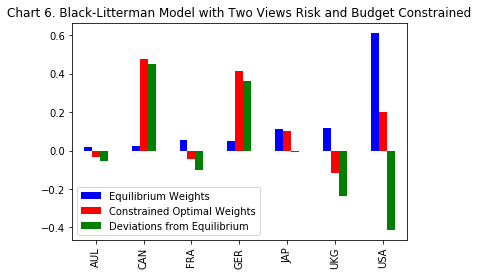

The risk & budget constrained optimal weights found for part2 are the following: 
     optimal weight
AUL       -0.033339
CAN        0.476586
FRA       -0.041868
GER        0.413239
JAP        0.102052
UKG       -0.117054
USA        0.200383


In [35]:
#On top of the risk constraint, budget constraint forces the sum of the total portfolio weights to be 1. Σwi = 1. 
#Now we faces 2 constraints. 
from pyomo.environ import ConcreteModel, Var, value, Reals, Constraint, Objective, maximize, minimize
from pyomo.opt import SolverFactory
M = list(range(0, 7)) #set model size
cov6 = cov.as_matrix() 
model = ConcreteModel()
model.x=Var(M, domain = Reals)
model.obj = Objective(expr = sum(model.x[i] * er_view2.item(i) for i in M), sense = maximize) #maximize returns
model.con1 = Constraint(expr = sum(model.x[j] * cov6[i][j] * model.x[i] for i in M for j in M) <= 0.04)
model.con2 = Constraint(expr = sum(model.x[i] for i in M) == 1.0) #budget constraint
solver = SolverFactory('ipopt')
solver.solve(model, tee = True)
w6=np.array([[value(model.x[0])],
             [value(model.x[1])],
             [value(model.x[2])],
             [value(model.x[3])],
             [value(model.x[4])],
             [value(model.x[5])],
             [value(model.x[6])]])

deviation6 = w6.reshape(n) - weq1
d6 = (pd.DataFrame([weq1, w6.reshape(n), deviation6], columns = countries, index=['Equilibrium Weights', 'Constrained Optimal Weights', 'Deviations from Equilibrium'])).T
result6 = d6.plot.bar(color = 'brg', title = 'Chart 6. Black-Litterman Model with Two Views Risk and Budget Constrained')
plt.show(result6)
#The optimal weight found is:
print('The risk & budget constrained optimal weights found for part2 are the following: ')
optimal_weight6 = pd.DataFrame(w6.T, columns = countries, index=['optimal weight']).T
print(optimal_weight6)

### P2 Chart 7

Ipopt 3.11.1: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.11.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:       14
Number of nonzeros in inequality constraint Jacobian.:        7
Number of nonzeros in Lagrangian Hessian.............:       28

Total number of variables............................:        7
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0


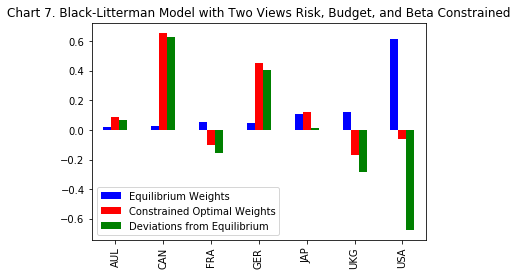

The risk & budget & beta constrained optimal weights found for part2 are the following: 
     optimal weight
AUL        0.091630
CAN        0.657642
FRA       -0.098187
GER        0.453833
JAP        0.122630
UKG       -0.166452
USA       -0.061096


In [36]:
#On top of the risk and budget constraints, beta constraint forces the sum of the total portfolio weights to be 1. Σwi = 1. 
#Now we faces 3 constraints. 
M2 = list(range(0, 7)) #set model size
cov7 = cov.as_matrix() 
model2 =ConcreteModel()
model2.x = Var(M, domain = Reals)
model2.obj = Objective(expr = sum(model2.x[i] * er_view2.item(i) for i in M2), sense = maximize) #maximize returns
model2.con1 = Constraint(expr = sum(model2.x[j] * cov7[i][j] * model2.x[i] for i in M2 for j in M2) <= 0.04) #risk constraint
model2.con2 = Constraint(expr = sum(model2.x[i] for i in M2) == 1.0) #budget constraint
EU1 = sum(model2.x[i] * cov7[i][j] * weq1.item(j) for i in M2 for j in M2)
EU2 = sum(weq1.item(i) * cov7[i][j] * weq1.item(j) for i in M2 for j in M2)
model2.con3 = Constraint(expr = EU1 == EU2) #beta constraint
solver = SolverFactory('ipopt')
solver.solve(model2, tee = True)
w7 = np.array([[value(model2.x[0])],
               [value(model2.x[1])],
               [value(model2.x[2])],
               [value(model2.x[3])],
               [value(model2.x[4])],
               [value(model2.x[5])],
               [value(model2.x[6])]])

deviation7 = w7.reshape(n) - weq1
d7 = (pd.DataFrame([weq1, w7.reshape(n), w7.reshape(n) - weq1], columns = countries, index=['Equilibrium Weights', 'Constrained Optimal Weights', 'Deviations from Equilibrium'])).T
result7 = d7.plot.bar(color = 'brg', title = 'Chart 7. Black-Litterman Model with Two Views Risk, Budget, and Beta Constrained')
plt.show(result7)

#The optimal weight found is:
print('The risk & budget & beta constrained optimal weights found for part2 are the following: ')
optimal_weight7 = pd.DataFrame(w7.T, columns = countries, index=['optimal weight']).T
print(optimal_weight7)

## CONCLUSION

In conclusion, the Black-Litterman model was used to analyze the world market with specific views in this project. 
Through Part 4, it was found that decrease in confidence (double omega) decreases the amount of expected returns and 
increase in outperformance % increased the amount of expected returns. 

In part 2, prior to the analysis, the equilibirum weight for Australia, Canada, and France, were increased by 0.5% and for Germany, Japan, and United Kingdom were decreased by 0.5% and the United States was unchanged. 
This caused a slight difference in the risk & budget (or & beta) constrained optimal weights. There were increase in the weights for the first three countries and decrease in the weights for the next three and these caused increase in the United States.

For Part1, 

The risk & budget constrained optimal weights found are the following: 
* AUL       -0.041634
* FRA       -0.033846
* GER        0.407417
* JAP        0.107241
* UKG       -0.112237
* USA        0.198071

The risk & budget & beta constrained optimal weights found are the following: 
* AUL        0.083521
* CAN        0.659704
* FRA       -0.084174
* GER        0.443422
* JAP        0.126261
* UKG       -0.163787
* USA       -0.064948

For Part 2, 

Equilibrium Portfolio Weight and Expected Returns were updated as the following: 

The Updated Equilibrium Portfolio Weight(%) for Part2: 
* AUL    0.021
* CAN    0.027
* FRA    0.057
* GER    0.050
* JAP    0.111
* UKG    0.119
* USA    0.615

The Updated Equilibrium Expected Returns(%) for Part2: 
* AUL    0.039462
* CAN    0.069359
* FRA    0.083565
* GER    0.090029
* JAP    0.042593
* UKG    0.067437
* USA    0.075672
* dtype: float64

The risk & budget constrained optimal weights found for part2 are the following: 
* AUL       -0.033339
* CAN        0.476586
* FRA       -0.041868
* GER        0.413239
* JAP        0.102052
* UKG       -0.117054
* USA        0.200383

The risk & budget & beta constrained optimal weights found for part2 are the following: 
* AUL        0.091630
* CAN        0.657642
* FRA       -0.098187
* GER        0.453833
* JAP        0.122630
* UKG       -0.166452
* USA       -0.061096

## BIBLIOGRAPHY

He, Guangliang, and Robert Litterman. The Intuition Behind Black-Litterman Model Portfolios. Investment Mangement Division, Goldman Sachs & Co. Quantitative Resources Group. December 1999.

Tütüncü, Reha, and Gerard Cornuejols. "Ch 8 QP Models: portfolio optimization." Optimization Methods in Finance. Cambridge University Press. 2007.